## Indikator penilaian


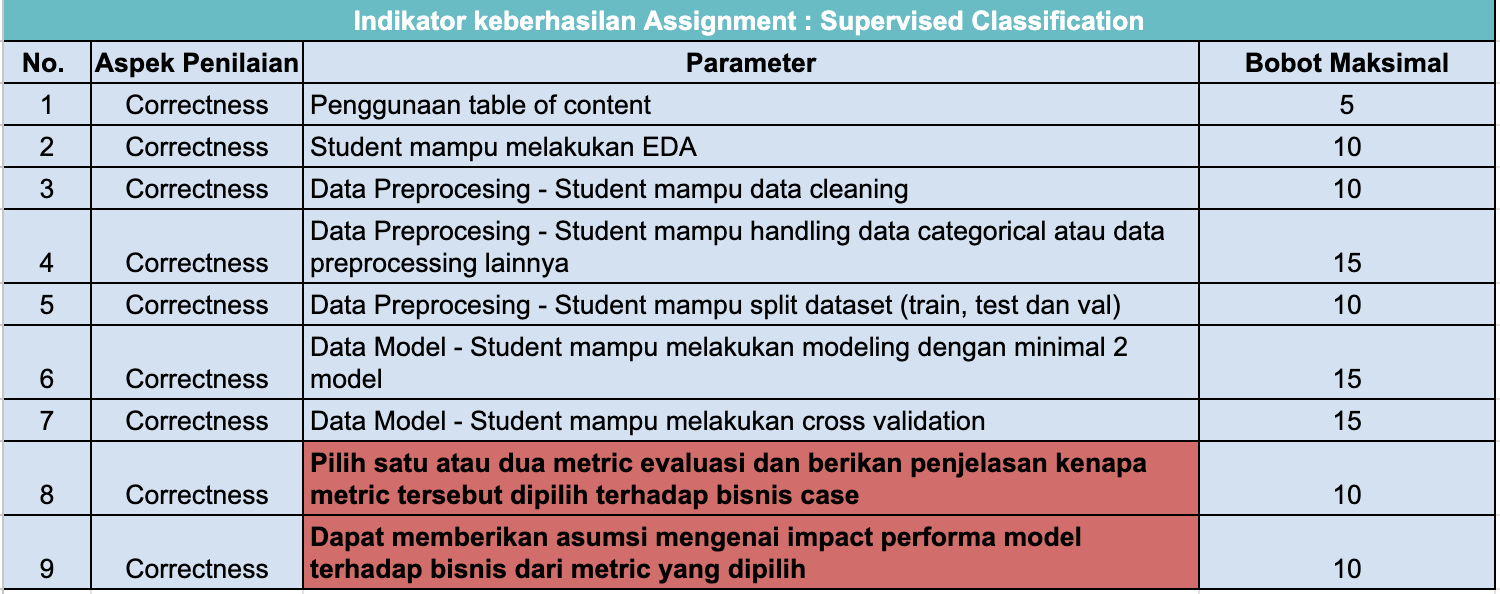

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment Dibimbing/Machine Learning Model/TelcoCustomerChurn.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1024,7147-AYBAA,Male,0,No,No,37,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.35,2552.9,No
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5431,5995-WWKKG,Female,0,No,No,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.80,695.05,No
1724,7398-SKNQZ,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.90,273.2,No
3815,9306-CPCBC,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.25,210.3,Yes
3000,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
3750,4415-WNGVR,Female,1,Yes,No,12,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,79.20,943.85,No
1273,9681-KYGYB,Male,1,Yes,No,49,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,88.20,4159.45,No
3834,2325-ZUSFD,Female,0,Yes,Yes,57,Yes,No,DSL,Yes,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),70.10,3913.3,Yes
3510,3199-XGZCY,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.25,576.7,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Split Dataset

In [ ]:
# menentukan target dan feature
feature = df.drop(columns='Churn')
target = df[['Churn']]

# Split Pretrain dan Test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

#Split Train dan Validation
feature_df_validation, feature_df_train, target_df_validation, target_df_train = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

feature_df_train.shape, feature_df_validation.shape, feature_df_test.shape

((1127, 20), (4507, 20), (1409, 20))

## Train

## EDA

### Data Preprocessing

#### Handling Missing Value

In [ ]:
feature_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 3575 to 3246
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1127 non-null   object 
 1   gender            1127 non-null   object 
 2   SeniorCitizen     1127 non-null   int64  
 3   Partner           1127 non-null   object 
 4   Dependents        1127 non-null   object 
 5   tenure            1127 non-null   int64  
 6   PhoneService      1127 non-null   object 
 7   MultipleLines     1127 non-null   object 
 8   InternetService   1127 non-null   object 
 9   OnlineSecurity    1127 non-null   object 
 10  OnlineBackup      1127 non-null   object 
 11  DeviceProtection  1127 non-null   object 
 12  TechSupport       1127 non-null   object 
 13  StreamingTV       1127 non-null   object 
 14  StreamingMovies   1127 non-null   object 
 15  Contract          1127 non-null   object 
 16  PaperlessBilling  1127 non-null   object 
 1

In [ ]:
feature_df_train.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Tidak terdeteksi adanya missing value di dalam data ini

#### Handling Duplicated

In [ ]:
feature_df_train.duplicated().sum()

np.int64(0)

Tidak terdeteksi juga adanya baris yang duplicated di sini

#### Handling Outlier

In [ ]:
feature_df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1127.000000,1127.000000,1127.000000
mean,0.157054,33.686779,65.086158
std,0.364013,24.774049,30.270280
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.475000
50%,0.000000,31.000000,70.700000
75%,0.000000,58.000000,90.175000
max,1.000000,72.000000,117.450000


Hanya terdapat tiga kolom bertipe Numerik yakni *SeniorCitizen, tenure, MonthlyCharges*

Distribusi Data Outlier


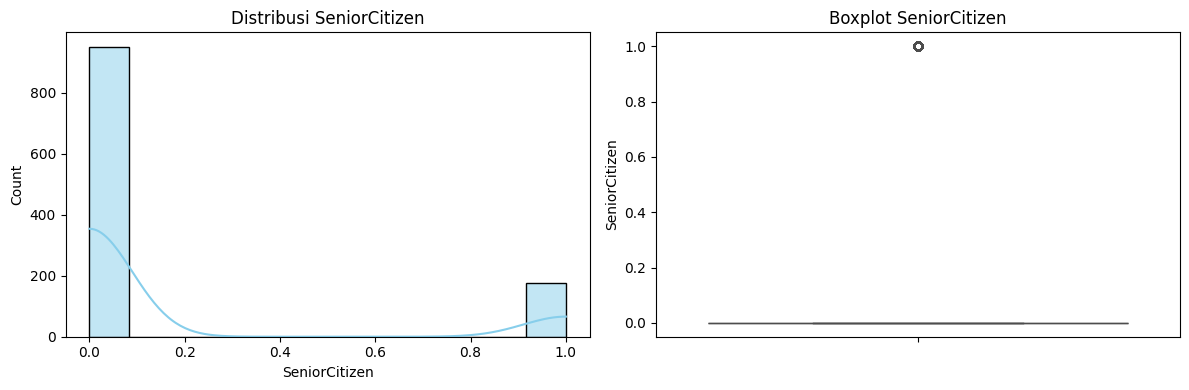

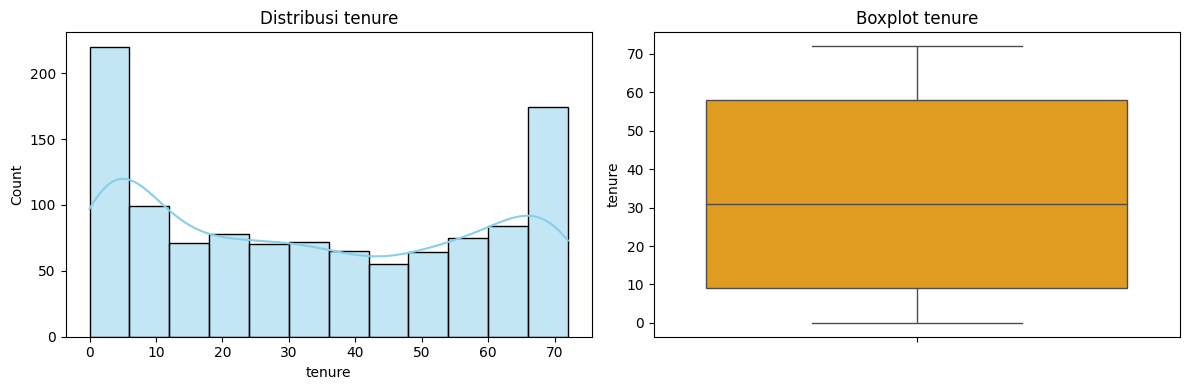

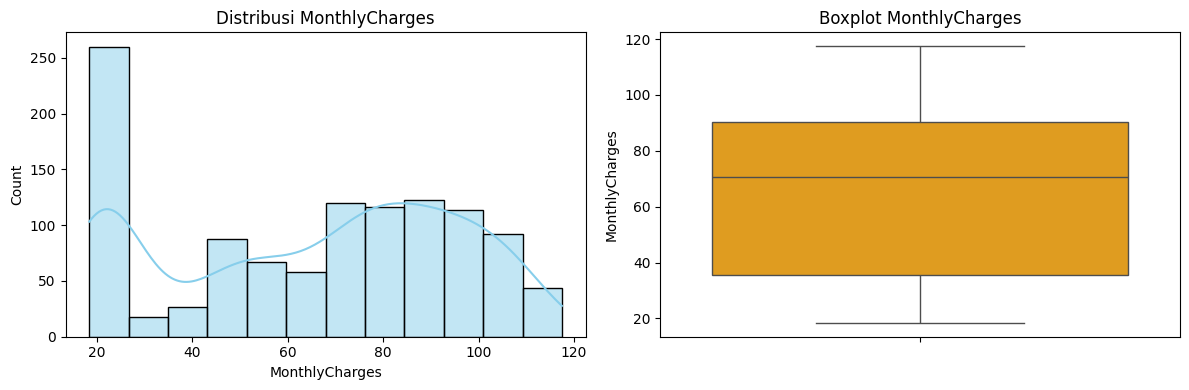

In [ ]:
kolom_kolom = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

def visualisasi(data, kolom):
  fig, axes = plt.subplots(1,2, figsize=(12,4))

  #plot Distribusi
  sns.histplot(data[kolom], kde=True, ax=axes[0], color='skyblue')
  axes[0].set_title(f'Distribusi {kolom}')

  # boxplot
  sns.boxplot(data[kolom], ax=axes[1], color='orange')
  axes[1].set_title(f'Boxplot {kolom}')

  plt.tight_layout()
  plt.show()


print("Distribusi Data Outlier")

for i in kolom_kolom:
  visualisasi(feature_df_train, i)

Dapat dilihat bahwa dari visualisasi di atas, tidak terdapat outlier sehingga data ini cukup aman untuk diproses lebih lanjut.

#### Feature Engineering

##### **TotalCharges menjadi Float**

Terdapat kejanggalan pada kolom TotalCharges, dimana seharusnya kolom ini merupakan numerik tetapi terbaca object, kemungkinan besar ada anomali data yang tidak terbaca sebagai number sehingga mengganggu data ini. Untuk itu kolom ini perlu dikonversi menjadi number terlebih Dahulu.

In [ ]:
# Konversi dtype object ke float
feature_df_train['TotalCharges'] = pd.to_numeric(feature_df_train['TotalCharges'], errors='coerce')

In [ ]:
#melihat jumlah data NaN
print(feature_df_train['TotalCharges'].isnull().sum())

1


Terdapat data NaN

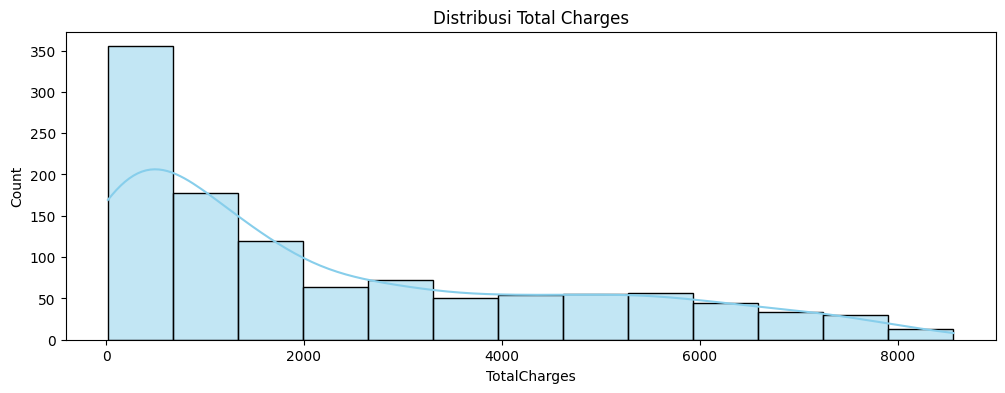

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(feature_df_train['TotalCharges'], kde=True, color='skyblue', ax=ax)
ax.set_title('Distribusi Total Charges')
plt.show()

In [ ]:
# memperbaiki baris yang terdapat NaN
feature_df_train['TotalCharges'] = feature_df_train['TotalCharges'].fillna(feature_df_train['TotalCharges'].median())
print(feature_df_train['TotalCharges'].isnull().sum())

0


Handling Missing value dengan Median karena distribusi datanya skewed positif, sehingga dengan menggunakan median, tidak mempengarhui sebaran datanya

##### **Encoding**

In [ ]:
feature_df_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
feature_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 3575 to 3246
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1127 non-null   object 
 1   gender            1127 non-null   object 
 2   SeniorCitizen     1127 non-null   int64  
 3   Partner           1127 non-null   object 
 4   Dependents        1127 non-null   object 
 5   tenure            1127 non-null   int64  
 6   PhoneService      1127 non-null   object 
 7   MultipleLines     1127 non-null   object 
 8   InternetService   1127 non-null   object 
 9   OnlineSecurity    1127 non-null   object 
 10  OnlineBackup      1127 non-null   object 
 11  DeviceProtection  1127 non-null   object 
 12  TechSupport       1127 non-null   object 
 13  StreamingTV       1127 non-null   object 
 14  StreamingMovies   1127 non-null   object 
 15  Contract          1127 non-null   object 
 16  PaperlessBilling  1127 non-null   object 
 1

In [ ]:
kolom_cek = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

for kolom in kolom_cek:
    print(f"Unique value di kolom {kolom}: {feature_df_train[kolom].unique()}")
    print(f"Jumlah unique value di kolom {kolom}: {feature_df_train[kolom].nunique()}")
    print()

Unique value di kolom gender: ['Male' 'Female']
Jumlah unique value di kolom gender: 2

Unique value di kolom SeniorCitizen: [0 1]
Jumlah unique value di kolom SeniorCitizen: 2

Unique value di kolom Partner: ['No' 'Yes']
Jumlah unique value di kolom Partner: 2

Unique value di kolom Dependents: ['No' 'Yes']
Jumlah unique value di kolom Dependents: 2

Unique value di kolom tenure: [59  4 41 46 54  3 72 71 67  9  1 49  5 12 10 55 50 23 45 27 62 64 65 24
 68 37 66 28 70 56 13 33 42  7 29 25 18  2 17 20 47 31  8 63 58 51 39 30
 52 32 15 40 14  6 22 69 53 36 19 11 61 60 16 44 48 26 57 21 43 35 38 34
  0]
Jumlah unique value di kolom tenure: 73

Unique value di kolom PhoneService: ['No' 'Yes']
Jumlah unique value di kolom PhoneService: 2

Unique value di kolom MultipleLines: ['No phone service' 'Yes' 'No']
Jumlah unique value di kolom MultipleLines: 3

Unique value di kolom InternetService: ['DSL' 'Fiber optic' 'No']
Jumlah unique value di kolom InternetService: 3

Unique value di kolom Onl

In [ ]:
kolom_binary = [kolom for kolom in feature_df_train.columns if feature_df_train[kolom].nunique() == 2]

for kolom in kolom_binary:
    print(f"Kolom: {kolom}")
    print(f"Unique Value: {feature_df_train[kolom].unique()}")
    print()

Kolom: gender
Unique Value: ['Male' 'Female']

Kolom: SeniorCitizen
Unique Value: [0 1]

Kolom: Partner
Unique Value: ['No' 'Yes']

Kolom: Dependents
Unique Value: ['No' 'Yes']

Kolom: PhoneService
Unique Value: ['No' 'Yes']

Kolom: PaperlessBilling
Unique Value: ['Yes' 'No']



Karena Model yang akan dibuat adalah *Decision Tree, Random Forest, XGBoost*. Model ini memiliki beberapa karakteristik yang unik, diantaranya:

1. tidak membutuhkan one-hot encoding untuk kategori
2. bisa bekerja baik dengan label encoding (kategori menjadi angka)
3. Bahkan one-hot encoding kadang malah membuat model lebih besar dan lambat

Untuk itu dalam encoding ini akan dilakukan menggunakan **Label Encoding**, dan dilakukan dengan cara bertahap untuk memisahkan proses encoding, mulai dari kolom yang terdiri atas 2 unique value, kemudian 3 unique value, selanjutnya 4 unique value. Tree-based models tidak sensitif terhadap urutan angka. One-hot encoding membuat dataset membesar tanpa meningkatkan akurasi

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
le = LabelEncoder()

# Label Encoding untuk kolom gender
feature_df_train['gender'] = le.fit_transform(feature_df_train['gender'])

# Label Encoding untuk kolom Partner
feature_df_train['Partner'] = le.fit_transform(feature_df_train['Partner'])

# Label Encoding untuk kolom Dependents
feature_df_train['Dependents'] = le.fit_transform(feature_df_train['Dependents'])

# Label Encoding untuk kolom PhoneService
feature_df_train['PhoneService'] = le.fit_transform(feature_df_train['PhoneService'])

# Label Encoding untuk kolom PaperlessBilling
feature_df_train['PaperlessBilling'] = le.fit_transform(feature_df_train['PaperlessBilling'])


In [ ]:
# Mengecek Ulang Data masing-masing Kolom
kolom_binary = [kolom for kolom in feature_df_train.columns if feature_df_train[kolom].nunique() == 2]

for kolom in kolom_binary:
    print(f"Kolom: {kolom}")
    print(f"Unique Value: {feature_df_train[kolom].unique()}")
    print()

Kolom: gender
Unique Value: [1 0]

Kolom: SeniorCitizen
Unique Value: [0 1]

Kolom: Partner
Unique Value: [0 1]

Kolom: Dependents
Unique Value: [0 1]

Kolom: PhoneService
Unique Value: [0 1]

Kolom: PaperlessBilling
Unique Value: [1 0]



Dapat dilihat bahwa kolom-kolom di atas sudah berubah menjadi data numerik. Selanjutnya adalah melakukan Label Encoding untuk data kategorikal lain.

In [ ]:
# Tampilkan kolom-kolom yang bertipe object
kolom_object = feature_df_train.select_dtypes(include=['object']).columns

# Tampilkan unique value dari kolom-kolom object
for kolom in kolom_object:
    print(f"Kolom: {kolom}")
    print(f"Unique Value: {feature_df_train[kolom].unique()}")
    print()

Kolom: customerID
Unique Value: ['9501-UKKNL' '0060-FUALY' '2951-QOQTK' ... '3325-FUYCG' '4717-GHADL'
 '8806-EAGWC']

Kolom: MultipleLines
Unique Value: ['No phone service' 'Yes' 'No']

Kolom: InternetService
Unique Value: ['DSL' 'Fiber optic' 'No']

Kolom: OnlineSecurity
Unique Value: ['No' 'Yes' 'No internet service']

Kolom: OnlineBackup
Unique Value: ['No' 'Yes' 'No internet service']

Kolom: DeviceProtection
Unique Value: ['No' 'Yes' 'No internet service']

Kolom: TechSupport
Unique Value: ['Yes' 'No' 'No internet service']

Kolom: StreamingTV
Unique Value: ['Yes' 'No' 'No internet service']

Kolom: StreamingMovies
Unique Value: ['Yes' 'No' 'No internet service']

Kolom: Contract
Unique Value: ['Month-to-month' 'Two year' 'One year']

Kolom: PaymentMethod
Unique Value: ['Electronic check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Mailed check']



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Membuat objek LabelEncoder
le = LabelEncoder()

# Membuat objek OrdinalEncoder
oe = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])

# Label Encoding untuk kolom-kolom
kolom_label = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']

for kolom in kolom_label:
    feature_df_train[kolom] = le.fit_transform(feature_df_train[kolom])

# Ordinal Encoding untuk kolom Contract
feature_df_train['Contract'] = oe.fit_transform(feature_df_train[['Contract']])


In [ ]:
kolom_cek = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

for kolom in kolom_cek:
    print(f"Unique value di kolom {kolom}: {feature_df_train[kolom].unique()}")
    print(f"Jumlah unique value di kolom {kolom}: {feature_df_train[kolom].nunique()}")
    print()

Unique value di kolom gender: [1 0]
Jumlah unique value di kolom gender: 2

Unique value di kolom SeniorCitizen: [0 1]
Jumlah unique value di kolom SeniorCitizen: 2

Unique value di kolom Partner: [0 1]
Jumlah unique value di kolom Partner: 2

Unique value di kolom Dependents: [0 1]
Jumlah unique value di kolom Dependents: 2

Unique value di kolom tenure: [59  4 41 46 54  3 72 71 67  9  1 49  5 12 10 55 50 23 45 27 62 64 65 24
 68 37 66 28 70 56 13 33 42  7 29 25 18  2 17 20 47 31  8 63 58 51 39 30
 52 32 15 40 14  6 22 69 53 36 19 11 61 60 16 44 48 26 57 21 43 35 38 34
  0]
Jumlah unique value di kolom tenure: 73

Unique value di kolom PhoneService: [0 1]
Jumlah unique value di kolom PhoneService: 2

Unique value di kolom MultipleLines: [1 2 0]
Jumlah unique value di kolom MultipleLines: 3

Unique value di kolom InternetService: [0 1 2]
Jumlah unique value di kolom InternetService: 3

Unique value di kolom OnlineSecurity: [0 2 1]
Jumlah unique value di kolom OnlineSecurity: 3

Unique 

In [ ]:
le = LabelEncoder()
feature_df_train['customerID'] = le.fit_transform(feature_df_train['customerID'])

In [ ]:
feature_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 3575 to 3246
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1127 non-null   int64  
 1   gender            1127 non-null   int64  
 2   SeniorCitizen     1127 non-null   int64  
 3   Partner           1127 non-null   int64  
 4   Dependents        1127 non-null   int64  
 5   tenure            1127 non-null   int64  
 6   PhoneService      1127 non-null   int64  
 7   MultipleLines     1127 non-null   int64  
 8   InternetService   1127 non-null   int64  
 9   OnlineSecurity    1127 non-null   int64  
 10  OnlineBackup      1127 non-null   int64  
 11  DeviceProtection  1127 non-null   int64  
 12  TechSupport       1127 non-null   int64  
 13  StreamingTV       1127 non-null   int64  
 14  StreamingMovies   1127 non-null   int64  
 15  Contract          1127 non-null   float64
 16  PaperlessBilling  1127 non-null   int64  
 1

Dapat dilihat bahwa, setelah proses Encoding, baik itu **Label Encoding** maupun **Ordinal Encoding (Contract)**, Keseluruhan data sudah berubah menjadi numerikal, kecuali kolom customerID. Data ini akan lebih mudah diproses untuk kebutuhan pembuatan model selanjutnya

### Imbalance Handling

In [ ]:
target = target_df_train['Churn'].value_counts()
target

,count
Churn,
No,822
Yes,305


In [ ]:
target = target_df_train['Churn'].value_counts(normalize=True)*100
target

,proportion
Churn,
No,72.937001
Yes,27.062999


In [ ]:
from imblearn.over_sampling import SMOTE

# Lakukan Imbalanced Handling pada data latih
smote = SMOTE(random_state=42)
feature_df_train_res, target_df_train_res = smote.fit_resample(feature_df_train, target_df_train)

In [ ]:
target = target_df_train_res['Churn'].value_counts(normalize=True)*100
target

,proportion
Churn,
No,50.0
Yes,50.0


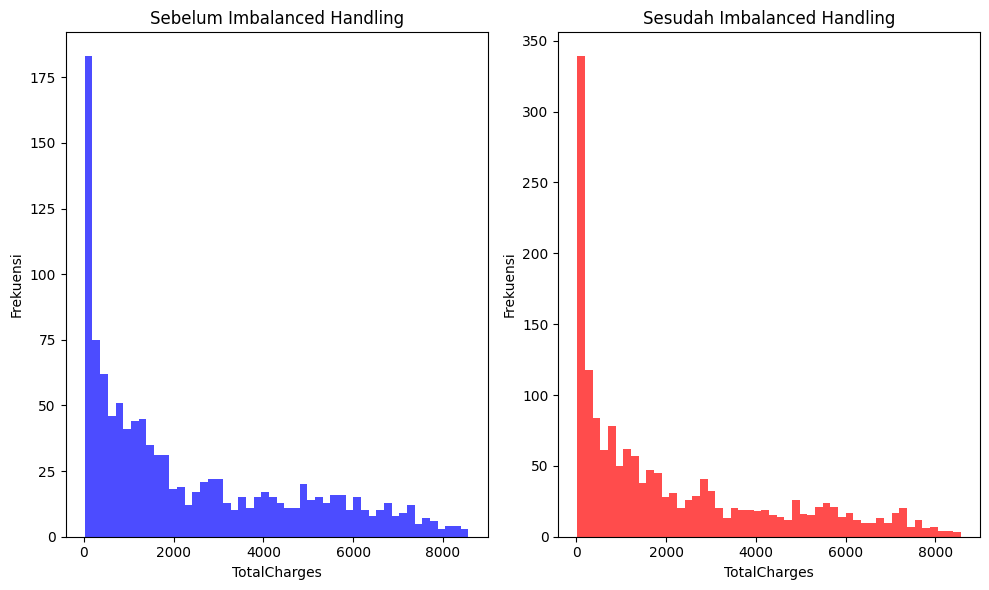

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(feature_df_train['TotalCharges'], bins=50, alpha=0.7, color='blue')
plt.title('Sebelum Imbalanced Handling')
plt.xlabel('TotalCharges')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.hist(feature_df_train_res['TotalCharges'], bins=50, alpha=0.7, color='red')
plt.title('Sesudah Imbalanced Handling')
plt.xlabel('TotalCharges')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [ ]:
feature_df_train.shape, feature_df_train_res.shape

((1127, 20), (1644, 20))

In [ ]:
target_df_train.shape, target_df_train_res.shape

((1127, 1), (1644, 1))

Visualisasi di atas menunjukkan perbandingan distribusi variabel **TotalCharges** sebelum dan sesudah penanganan ketidakseimbangan data menggunakan metode **SMOTE**. Pada grafik sebelah kiri (Sebelum Imbalanced Handling), terlihat bahwa distribusi jumlah sampel masih terpusat pada kelompok mayoritas, sehingga kelas dengan jumlah observasi kecil masih sangat kurang terwakili. Kondisi ini dapat menyebabkan model cenderung “bias” karena lebih sering belajar dari kelas mayoritas dibanding kelas minoritas. Setelah penerapan SMOTE (grafik kanan), jumlah sampel kelas minoritas meningkat secara signifikan sehingga distribusi data menjadi lebih seimbang. Metode SMOTE bekerja dengan cara mensintesis sampel baru pada kelas minoritas berdasarkan interpolasi antar sampel yang berdekatan, bukan hanya melakukan duplikasi data, sehingga variasi data tetap terjaga.

Penggunaan SMOTE diperlukan karena model Machine Learning, khususnya klasifikasi, cenderung mengalami penurunan performa pada dataset yang tidak seimbang. Model dapat mencapai akurasi tinggi namun gagal memprediksi kelas minoritas secara tepat (misal recall rendah). Dengan menyeimbangkan dataset menggunakan SMOTE, model akan memiliki kesempatan yang lebih adil untuk belajar pola dari kedua kelas secara seimbang, sehingga hasil prediksi menjadi lebih stabil, tidak bias ke kelas mayoritas, dan meningkatkan metrik seperti recall, f1-score, atau balanced accuracy.


### **Kesimpulan Preprocessing Data**

Preprocessing Data yang telah dilakukan di atas adalah sebagai berikut:
1. Mengubah Kolom *TotalCharges* menjadi Numerik
2. Menggantu NaN di dalam kolom *TotalCharges* dengan nilai mean
3. Melakukan Encoding untuk setiap data kategorikal kecuali kolom *customerID*
4. Imbalanced Handling

Hal ini penting diingat karena sejumlah feature engineering perlu diterapkan juga pada data validation dan data testing

### **Preprocessing Data Validation dan Test**

#### Handling TotalCharges menjadi numerik

In [ ]:
feature_df_validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 4806 to 6651
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4507 non-null   object 
 1   gender            4507 non-null   object 
 2   SeniorCitizen     4507 non-null   int64  
 3   Partner           4507 non-null   object 
 4   Dependents        4507 non-null   object 
 5   tenure            4507 non-null   int64  
 6   PhoneService      4507 non-null   object 
 7   MultipleLines     4507 non-null   object 
 8   InternetService   4507 non-null   object 
 9   OnlineSecurity    4507 non-null   object 
 10  OnlineBackup      4507 non-null   object 
 11  DeviceProtection  4507 non-null   object 
 12  TechSupport       4507 non-null   object 
 13  StreamingTV       4507 non-null   object 
 14  StreamingMovies   4507 non-null   object 
 15  Contract          4507 non-null   object 
 16  PaperlessBilling  4507 non-null   object 
 1

In [ ]:
feature_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 185 to 1161
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 
 17

Kolom *TotalCharges* masih bertipe objek, jadi harus diubah menjadi numerik terlebih dahulu

In [ ]:
# Konversi dtype object ke float
feature_df_test['TotalCharges'] = pd.to_numeric(feature_df_test['TotalCharges'], errors='coerce')
feature_df_validation['TotalCharges'] = pd.to_numeric(feature_df_validation['TotalCharges'], errors='coerce')

In [ ]:
#melihat tipe data
print(feature_df_test['TotalCharges'].dtype)
print(feature_df_validation['TotalCharges'].dtype)

float64
float64


Kolom *TotalCharges* sudah menjadi Numerik

In [ ]:
#melihat jumlah data NaN
print(feature_df_test['TotalCharges'].isnull().sum())
print(feature_df_validation['TotalCharges'].isnull().sum())

1
9


Text(0.5, 1.0, 'Distribusi Data Validation')

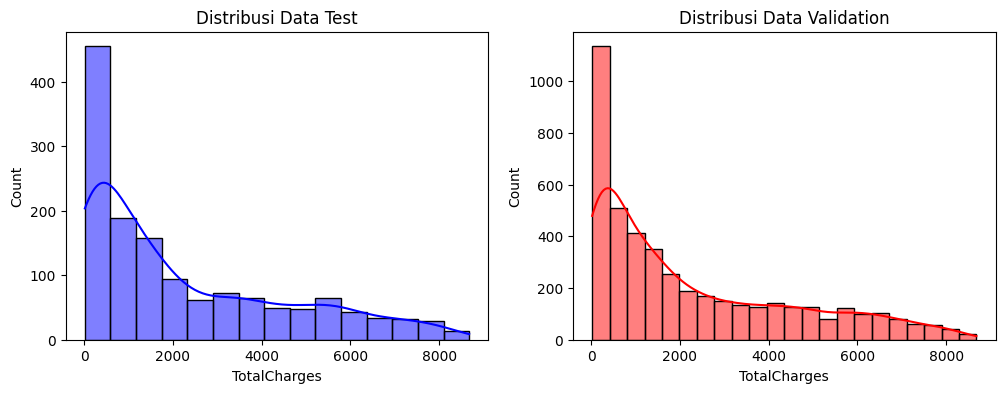

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

#plot Distribusi data test
sns.histplot(feature_df_test['TotalCharges'], kde=True, ax=axes[0], color='blue')
axes[0].set_title(f'Distribusi Data Test')

#plot Distribusi data validation
sns.histplot(feature_df_validation['TotalCharges'],  kde=True, ax=axes[1], color='red')
axes[1].set_title(f'Distribusi Data Validation')


Karena proses sebelumnya mengubah data kategorikal yang terdapat di kolom *TotalCharges* menjadi NaN, sehingga sekarang muncul data NaN di dalam data ini. Dapat dilihat pada visualisasi di atas, distribusi data *TotalCharges* adalah positif skewed sehingga dalam handling missing value sebaiknya menggunakan **median** agar tidak mengganggu distribusi data yang ada.

In [ ]:
# Mengganti baris yang terdapat NaN dengan nilai median

# data test
feature_df_test['TotalCharges'] = feature_df_test['TotalCharges'].fillna(feature_df_test['TotalCharges'].median())
print(feature_df_test['TotalCharges'].isnull().sum())

# data validation
feature_df_validation['TotalCharges'] = feature_df_validation['TotalCharges'].fillna(feature_df_validation['TotalCharges'].median())
print(feature_df_validation['TotalCharges'].isnull().sum())

0
0


Sudah bersih dari missing value

#### Encoding

In [ ]:
object_cols = feature_df_test.select_dtypes(include=['object']).columns
print(object_cols)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
# Kolom yang akan di-label encoding
label_cols = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

# Kolom Contract akan di-ordinal encoding
ordinal_cols = ['Contract']

# Label encoding
le = LabelEncoder()
for col in label_cols:
    feature_df_test[col] = le.fit_transform(feature_df_test[col])
    feature_df_validation[col] = le.fit_transform(feature_df_validation[col])

# Ordinal encoding
oe = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
feature_df_test['Contract'] = oe.fit_transform(feature_df_test[['Contract']])
feature_df_validation['Contract'] = oe.fit_transform(feature_df_validation[['Contract']])

In [ ]:
feature_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 185 to 1161
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   int64  
 1   gender            1409 non-null   int64  
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   int64  
 4   Dependents        1409 non-null   int64  
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   int64  
 7   MultipleLines     1409 non-null   int64  
 8   InternetService   1409 non-null   int64  
 9   OnlineSecurity    1409 non-null   int64  
 10  OnlineBackup      1409 non-null   int64  
 11  DeviceProtection  1409 non-null   int64  
 12  TechSupport       1409 non-null   int64  
 13  StreamingTV       1409 non-null   int64  
 14  StreamingMovies   1409 non-null   int64  
 15  Contract          1409 non-null   float64
 16  PaperlessBilling  1409 non-null   int64  
 17

In [ ]:
feature_df_validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 4806 to 6651
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4507 non-null   int64  
 1   gender            4507 non-null   int64  
 2   SeniorCitizen     4507 non-null   int64  
 3   Partner           4507 non-null   int64  
 4   Dependents        4507 non-null   int64  
 5   tenure            4507 non-null   int64  
 6   PhoneService      4507 non-null   int64  
 7   MultipleLines     4507 non-null   int64  
 8   InternetService   4507 non-null   int64  
 9   OnlineSecurity    4507 non-null   int64  
 10  OnlineBackup      4507 non-null   int64  
 11  DeviceProtection  4507 non-null   int64  
 12  TechSupport       4507 non-null   int64  
 13  StreamingTV       4507 non-null   int64  
 14  StreamingMovies   4507 non-null   int64  
 15  Contract          4507 non-null   float64
 16  PaperlessBilling  4507 non-null   int64  
 1

Data Validation dan Data Testing sudah di-treat layaknya data train, Handling yang dilakukan adalah meliputi handling kolom *TotalCharges* yang semula bertipe object menjadi numerik, kemudian melakukan label encoding untuk kolom-kolom bertipe object, untuk kolom contract diterapkan ordinal encoding.

### Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

#### Modeling Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
feature_df_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1644 non-null   int64  
 1   gender            1644 non-null   int64  
 2   SeniorCitizen     1644 non-null   int64  
 3   Partner           1644 non-null   int64  
 4   Dependents        1644 non-null   int64  
 5   tenure            1644 non-null   int64  
 6   PhoneService      1644 non-null   int64  
 7   MultipleLines     1644 non-null   int64  
 8   InternetService   1644 non-null   int64  
 9   OnlineSecurity    1644 non-null   int64  
 10  OnlineBackup      1644 non-null   int64  
 11  DeviceProtection  1644 non-null   int64  
 12  TechSupport       1644 non-null   int64  
 13  StreamingTV       1644 non-null   int64  
 14  StreamingMovies   1644 non-null   int64  
 15  Contract          1644 non-null   float64
 16  PaperlessBilling  1644 non-null   int64  


In [ ]:
# Membuat model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data train
model_dt.fit(feature_df_train_res, target_df_train_res)

# Memprediksi data validation
y_pred_val = model_dt.predict(feature_df_validation)

In [ ]:
# Evaluasi model pada data validation
print("Akurasi pada data validation:", accuracy_score(target_df_validation, y_pred_val))
print("Laporan klasifikasi pada data validation:\n", classification_report(target_df_validation, y_pred_val))
print("Matriks konfusi pada data validation:\n", confusion_matrix(target_df_validation, y_pred_val))

Akurasi pada data validation: 0.7000221877080097
Laporan klasifikasi pada data validation:
               precision    recall  f1-score   support

          No       0.82      0.76      0.79      3316
         Yes       0.44      0.54      0.49      1191

    accuracy                           0.70      4507
   macro avg       0.63      0.65      0.64      4507
weighted avg       0.72      0.70      0.71      4507

Matriks konfusi pada data validation:
 [[2512  804]
 [ 548  643]]


Hasil evaluasi model Decision Tree pada data validation menunjukkan bahwa model memiliki akurasi sebesar 0.70, yang berarti sekitar 70% prediksi model sesuai dengan kondisi sebenarnya. Dari laporan klasifikasi terlihat bahwa performa model lebih baik dalam memprediksi kelas **“No”** dibandingkan kelas **“Yes”**. Hal ini ditunjukkan oleh nilai precision sebesar 0.82 dan recall 0.76 pada kelas “No”, sedangkan kelas “Yes” hanya mencapai precision 0.44 dan recall 0.54. Artinya, ketika model memprediksi pelanggan akan churn (“Yes”), sekitar setengahnya benar, dan masih cukup banyak pelanggan yang churn namun tidak terdeteksi oleh model. Matriks konfusi juga memperkuat hal ini, di mana 548 pelanggan churn salah diprediksi sebagai tidak churn. Ketidakseimbangan performa antar kelas ini menunjukkan bahwa model masih cenderung bias pada kelas mayoritas, sehingga meskipun akurasi tergolong baik, kemampuan model mendeteksi pelanggan churn masih perlu ditingkatkan, misalnya dengan tuning hyperparameter atau pendekatan penanganan imbalance data yang lebih optimal.


#### Modeling Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Buat model random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(feature_df_train_res, target_df_train_res)

# Prediksi pada data validation
y_pred_val = rf_model.predict(feature_df_validation)

In [ ]:
# Evaluasi model pada data validation
print("Akurasi pada data validation:", accuracy_score(target_df_validation, y_pred_val))
print("Laporan klasifikasi pada data validation:\n", classification_report(target_df_validation, y_pred_val))
print("Matriks konfusi pada data validation:\n", confusion_matrix(target_df_validation, y_pred_val))

Akurasi pada data validation: 0.7663634346571999
Laporan klasifikasi pada data validation:
               precision    recall  f1-score   support

          No       0.84      0.84      0.84      3316
         Yes       0.56      0.57      0.56      1191

    accuracy                           0.77      4507
   macro avg       0.70      0.70      0.70      4507
weighted avg       0.77      0.77      0.77      4507

Matriks konfusi pada data validation:
 [[2773  543]
 [ 510  681]]


Hasil evaluasi model Random Forest pada data validasi menunjukkan bahwa model memiliki performa yang cukup baik dengan tingkat akurasi sebesar **0.766**, artinya sekitar 76.6% data pada set validasi berhasil diprediksi dengan benar. Berdasarkan laporan klasifikasi, model mampu memprediksi kelas mayoritas (**No**) dengan sangat baik, terlihat dari nilai precision, recall, dan f1-score yang sama-sama berada pada kisaran **0.84**. Namun, untuk kelas minoritas (**Yes**, yaitu pelanggan yang benar-benar melakukan churn), performanya masih lebih rendah dengan precision sebesar **0.56**, recall **0.57**, dan f1-score **0.56**. Hal ini menunjukkan bahwa meskipun model cukup mampu mengenali sebagian pelanggan yang melakukan churn, masih banyak kasus churn yang belum dapat dideteksi secara tepat.

Kontribusi tersebut juga terlihat dari matriks konfusi, dimana dari **1191 pelanggan churn**, hanya **681** yang berhasil diprediksi dengan benar, sementara **510** salah digolongkan sebagai tidak churn. Sebaliknya, model cukup baik dalam memprediksi pelanggan yang tidak churn, dengan **2773** dari 3316 data terklasifikasi benar. Secara keseluruhan, skor macro average sebesar **0.70** dan weighted average sebesar **0.77** menunjukkan performa yang stabil namun masih dipengaruhi ketidakseimbangan kelas. Dengan demikian, meskipun Random Forest memberikan hasil yang lebih baik dibanding beberapa model lainnya, masih ada ruang peningkatan terutama dalam mendeteksi pelanggan yang berisiko churn, misalnya dengan tuning hyperparameter, menerapkan metode oversampling/SMOTE, atau memilih model yang lebih sensitif terhadap kelas minoritas.


### Data Test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Prediksi menggunakan model Decision Tree
y_pred_dt = model_dt.predict(feature_df_test)
y_pred_proba_dt = model_dt.predict_proba(feature_df_test)[:, 1]

# Prediksi menggunakan model Random Forest
y_pred_rf = rf_model.predict(feature_df_test)
y_pred_proba_rf = rf_model.predict_proba(feature_df_test)[:, 1]

### Evaluation

In [ ]:
# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(target_df_test, y_pred_dt)
precision_dt = precision_score(target_df_test, y_pred_dt, pos_label='Yes')
recall_dt = recall_score(target_df_test, y_pred_dt, pos_label='Yes')
f1_dt = f1_score(target_df_test, y_pred_dt, pos_label='Yes')
auc_roc_dt = roc_auc_score(target_df_test, y_pred_proba_dt)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(target_df_test, y_pred_rf)
precision_rf = precision_score(target_df_test, y_pred_rf, pos_label='Yes')
recall_rf = recall_score(target_df_test, y_pred_rf, pos_label='Yes')
f1_rf = f1_score(target_df_test, y_pred_rf, pos_label='Yes')
auc_roc_rf = roc_auc_score(target_df_test, y_pred_proba_rf)

print("Metrik Evaluasi Model Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("AUC-ROC:", auc_roc_dt)
print("Laporan Klasifikasi:")
print(classification_report(target_df_test, y_pred_dt))
print("Matriks Konfusi:")
print(confusion_matrix(target_df_test, y_pred_dt))

print("="*80)

print("\nMetrik Evaluasi Model Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("AUC-ROC:", auc_roc_rf)
print("Laporan Klasifikasi:")
print(classification_report(target_df_test, y_pred_rf))
print("Matriks Konfusi:")
print(confusion_matrix(target_df_test, y_pred_rf))

Metrik Evaluasi Model Decision Tree:
Accuracy: 0.7139815471965933
Precision: 0.4634146341463415
Recall: 0.5093833780160858
F1-score: 0.48531289910600256
AUC-ROC: 0.6485140828304367
Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.82      0.79      0.80      1036
         Yes       0.46      0.51      0.49       373

    accuracy                           0.71      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.71      0.72      1409

Matriks Konfusi:
[[816 220]
 [183 190]]

Metrik Evaluasi Model Random Forest:
Accuracy: 0.7863733144073811
Precision: 0.5989010989010989
Recall: 0.5844504021447721
F1-score: 0.5915875169606513
AUC-ROC: 0.8216407713726748
Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.85      0.86      0.86      1036
         Yes       0.60      0.58      0.59       373

    accuracy                           0.79      1409
   macro av

Berdasarkan hasil evaluasi, model **Random Forest menunjukkan performa yang lebih unggul dibandingkan Decision Tree** dalam memprediksi kemungkinan pelanggan melakukan churn. Pada model Decision Tree, akurasi yang diperoleh sebesar **0.71**, sementara Random Forest mencapai **0.79**, menunjukkan bahwa Random Forest mampu memprediksi lebih banyak kasus dengan benar. Hal ini juga terlihat dari peningkatan metrik lainnya, di mana precision pada Decision Tree hanya **0.46**, sedangkan Random Forest mencapai **0.60**, yang berarti model Random Forest lebih mampu memberikan prediksi churn yang tepat tanpa terlalu banyak kesalahan positif. Selain itu, nilai recall pada Random Forest lebih tinggi (**0.58**) dibanding Decision Tree (**0.51**), menandakan bahwa Random Forest lebih baik dalam menangkap pelanggan yang benar-benar churn, yang merupakan metrik penting dalam konteks bisnis karena fokus utama adalah mengidentifikasi pelanggan berisiko agar dapat dilakukan intervensi sebelum mereka benar-benar berhenti berlangganan.

Peningkatan performa juga tercermin pada skor F1, di mana Random Forest memperoleh nilai **0.59** dibandingkan Decision Tree yang hanya **0.48**, menandakan keseimbangan prediksi positif yang lebih baik antara precision dan recall. Lebih jauh lagi, nilai **AUC-ROC Random Forest mencapai 0.82**, jauh di atas Decision Tree yang hanya **0.65**, menunjukkan bahwa Random Forest secara konsisten lebih baik dalam membedakan pelanggan churn dan tidak churn di berbagai threshold probabilitas. Dari matriks konfusi, Random Forest juga menghasilkan lebih sedikit kesalahan klasifikasi baik pada kelas churn maupun non-churn. Secara keseluruhan, Random Forest dipilih sebagai model terbaik karena memberikan akurasi lebih tinggi, kemampuan generalisasi lebih kuat, dan performa lebih stabil dalam menghadapi data yang masih cenderung imbalance. Dengan kekuatan tersebut, Random Forest lebih sesuai untuk mendukung kebutuhan bisnis dalam meminimalkan churn dan mendukung strategi retensi pelanggan secara lebih efektif.

### Pertanyaan di Assignment Guidance

1. Setelah membandingkan beberapa algoritma klasifikasi, apa yang kamu pelajari tentang kekuatan dan kelemahan masing-masing model? Mengapa pemilihan model terbaik tidak bisa hanya dilihat dari satu metrik evaluasi saja?

2. Bagaimana hasil evaluasi model (Accuracy, Precision, Recall, F1-score, AUC) membantu kamu memahami perilaku pelanggan yang berpotensi churn? Mengapa kemampuan interpretasi ini penting dalam konteks pengambilan keputusan bisnis?


#### Jawaban

Pemilihan model klasifikasi tidak dapat bergantung pada satu metrik evaluasi saja, karena setiap metrik merepresentasikan aspek performa yang berbeda. Berdasarkan hasil evaluasi, Decision Tree menunjukkan akurasi 0.71 dengan recall sebesar 0.51 untuk kelas churn, yang berarti hampir separuh pelanggan yang benar-benar melakukan churn tidak berhasil dikenali. Sementara itu, Random Forest memberikan performa yang lebih kuat dengan akurasi 0.79, recall 0.58, dan AUC mencapai 0.82, menandakan kemampuan yang lebih baik dalam membedakan pelanggan churn dan non-churn. Perbedaan ini menunjukkan bahwa meskipun akurasi Random Forest lebih tinggi, keputusan tidak cukup diambil hanya dari akurasi saja—karena dalam kasus churn, kemampuan mendeteksi pelanggan berisiko (recall) dan keseimbangan antara kesalahan prediksi (F1-score) lebih penting untuk menghindari kehilangan pelanggan bernilai tinggi. Evaluasi yang komprehensif dari accuracy, precision, recall, F1-score, dan AUC membantu memahami perilaku pelanggan secara lebih mendalam. Misalnya, metrik recall menunjukkan seberapa banyak pelanggan churn yang berhasil ditangkap model, sementara precision menunjukkan ketepatan prediksi sehingga perusahaan tidak salah memberikan program retensi kepada pelanggan yang sebenarnya tidak akan churn. Dengan demikian, interpretasi metrik ini sangat penting bagi pengambilan keputusan bisnis karena membantu perusahaan menentukan strategi retensi yang efektif, mengefisiensikan penggunaan biaya promosi, serta memprioritaskan pelanggan dengan risiko churn tertinggi secara data-driven.


### Potential impact

Pengembangan model Decision Tree dan Random Forest memberikan insight bisnis yang berharga dalam memahami pola perilaku pelanggan yang berpotensi melakukan churn. Melalui proses pemodelan ini, perusahaan dapat mengidentifikasi faktor-faktor yang paling mempengaruhi keputusan pelanggan untuk berhenti menggunakan layanan, seperti jenis kontrak, biaya bulanan, lamanya berlangganan, serta kualitas layanan pendukung. Model Decision Tree memberikan interpretasi yang sederhana dan mudah dipahami oleh tim bisnis karena logika pemisahannya dapat divisualisasikan, sehingga membantu manajemen memahami jalur pengambilan keputusan yang mendorong churn. Sementara itu, Random Forest memberikan performa prediksi yang lebih kuat dan stabil, sehingga dapat digunakan sebagai model utama dalam sistem deteksi dini pelanggan berisiko. Dampak bisnis dari model ini sangat signifikan: perusahaan dapat membuat strategi retensi yang lebih tepat sasaran, mengalokasikan anggaran promosi hanya kepada pelanggan yang benar-benar berisiko churn, meningkatkan efektivitas layanan pelanggan, dan pada akhirnya menurunkan tingkat churn secara keseluruhan. Selain itu, kemampuan memprediksi churn sejak dini juga membuka peluang untuk meningkatkan loyalitas pelanggan, memperkuat competitive advantage, dan membantu perusahaan bergerak menuju pengambilan keputusan berbasis data (data-driven decision making).
